### PyTorch's Computation Graphs

In [3]:
import torch

In [4]:
def compute_z( a, b, c ):
    r1 = torch.sub(a,b)
    r2 = torch.mul(r1,2)
    z  = torch.add(r2,c)
    return z

In [5]:
compute_z(1,2,3)

tensor(1)

In [6]:
compute_z(torch.tensor(1),torch.tensor(2),torch.tensor(3))

tensor(1)

In [7]:
compute_z(torch.tensor([[1]]),torch.tensor([[2]]),torch.tensor([[3]]))

tensor([[1]])

### Tensors Gradient

In [8]:
a = torch.tensor([3.123,123,321])
print(a.requires_grad)

False


In [9]:
a.requires_grad_()
print(a.requires_grad)

True


The `method_()` methods are in-place functions to increase efficiency.

### Tensors Random Init

In [10]:
import torch.nn as nn

In [11]:
a = torch.empty(2,3)
nn.init.xavier_normal_(a)

tensor([[-0.3944, -0.2626,  1.0169],
        [-0.0609, -0.6730, -0.2243]])

In [12]:
class myModule( nn.Module ):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, reqeuire_grad = True )
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, reqeuire_grad = True )
        nn.init.xavier_normal_(self.w2)

### Automatic Diffrentation

In [13]:
w = torch.tensor( (2.0, 3.0), requires_grad = True ) 
b = torch.tensor( 2.0, requires_grad = True ) 
x = torch.randn(2)

In [14]:
z = (x.mul(w)).add(b)
z

tensor([ 0.6158, -0.7107], grad_fn=<AddBackward0>)

In [15]:
y = torch.tensor( [1.5, 4.3] )

In [16]:
loss = ( y.sub(z) ).pow(2).sum()

In [17]:
loss.backward()
print(f"dL/dw : {w.grad}")
print(f"dL/db : {b.grad}")

dL/dw : tensor([1.2239, 9.0549])
dL/db : -11.789711952209473


### nn.Sequential

In [18]:
'''
    In order to bind some nn.modules after each other we can
    use this method. It is a kind of container that will
    execute in a sequential way.
'''

'\n    In order to bind some nn.modules after each other we can\n    use this method. It is a kind of container that will\n    execute in a sequential way.\n'

In [19]:
model = nn.Sequential(
    nn.Linear(14,6),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=14, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [20]:
nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()
l1_penalty

tensor(0.6393, grad_fn=<MulBackward0>)

In [28]:
loss_fn = nn.BCELoss()
optim = torch.optim.SGD(lr=0.001, params = model.parameters() )

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
torch.manual_seed(0)
np.random.seed(0)

In [49]:
x = np.random.uniform( low = -1, high = 1, size = (200,2) )
y = np.ones( len(x) )
y[ x[:,0] * x[:,1] < 0 ] = 0

In [50]:
n_train = 100

x_train = torch.tensor( x[:n_train, :], dtype = torch.float32 ) 
x_valid = torch.tensor( x[n_train:, :], dtype = torch.float32 ) 

y_train = torch.tensor( y[:n_train], dtype = torch.float32 ) 
y_valid = torch.tensor( y[n_train:], dtype = torch.float32 ) 

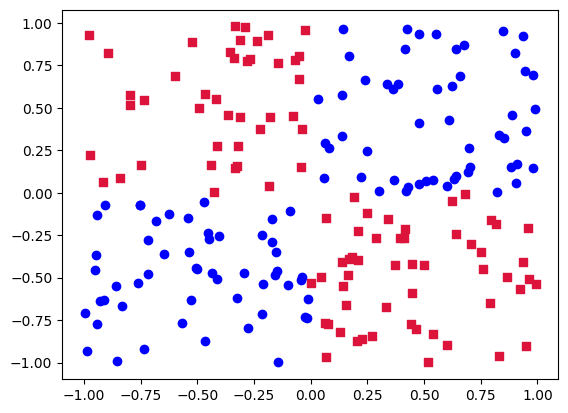

In [61]:
plt.scatter( x[ y == 0, 0], x[ y == 0, 1], color = "crimson",marker = "s")
plt.scatter( x[ y == 1, 0], x[ y == 1, 1], color = "blue" )

In [63]:
model1 = nn.Sequential(
    nn.Linear(2,1),
    nn.Softmax() 
)

In [66]:
loss_fun = nn.BCELoss()
optim = torch.optim.SGD( params=model1.parameters(), lr=0.01)

In [67]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [68]:
td_train = TensorDataset( x_train, y_train ) 
dl_train = DataLoader(dataset=td_train, batch_size=2, shuffle=True )

In [77]:
for x_batch, y_batch in dl_train:
    pred = model1( x_batch )
    break

In [85]:
(( pred == 1 ).float() == y_batch ).float()

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
is_correct = 

In [ ]:
def train( model, x_valid, y_valid, dl, n_epoch ):
    loss_hist_train = [0] * n_epoch
    acc_hist_train = [0] * n_epoch
    loss_hist_valid = [0] * n_epoch
    acc_hist_valid = [0] * n_epoch
    for e in range(n_epoch):
        for x_batch, y_batch in dl:
            y_pred = model(x_batch)
            cost = loss_fun( y_pred, y_batch )
            cost.backward()
            optim.step()
            optim.zero_grad()
            loss_hist_train[n_epoch] += cost.item()
            loss_hist_train[n_epoch] += cost.item()